<a href="https://colab.research.google.com/github/EduardodosSantosRocha2/CNN_LION_VS_DOG/blob/main/LionVsDog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bibliotecas

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.__version__

'2.18.0'

## Carregando Imagens

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = '/content/drive/MyDrive/CursoMCL/VisãoComputacional/CNN/DuckOrLion.zip'
zip_object = zipfile.ZipFile(file = path, mode= 'r')
zip_object.extractall('./')
zip_object.close()

Bases Treinamento e teste

In [4]:
gerador_treinamento = ImageDataGenerator(rescale=1./255, rotation_range = 7, horizontal_flip=True, zoom_range=0.2)

In [5]:
dataset_treinamento = gerador_treinamento.flow_from_directory('/content/DuckOrLion/train_set', target_size=(64,64), batch_size=8, class_mode='categorical', shuffle=True)

Found 4717 images belonging to 2 classes.


In [6]:
dataset_treinamento.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [7]:
dataset_treinamento.class_indices

{'dog': 0, 'lion': 1}

## Construção da rede neural


In [8]:
gerador_teste = ImageDataGenerator(rescale=1./255)

In [9]:
dataset_teste = gerador_teste.flow_from_directory('/content/DuckOrLion/test_set', target_size=(64,64), batch_size=1, class_mode='categorical', shuffle=False)

Found 2441 images belonging to 2 classes.


## Construção e treinamento da rede neural

In [10]:
network = Sequential()
network.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(64,64,3)))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Flatten())
network.add(Dense(units=577, activation='relu'))
network.add(Dense(units=577, activation='relu'))
network.add(Dense(units=2, activation='softmax'))

network.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 577)                 │         665,281 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 577)                 │         333,506 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │           1,156 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,019,335 (3.89 MB)

 Trainable params: 1,019,335 (3.89 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
network.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
historico = network.fit(dataset_treinamento, epochs=20)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


590/590 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.7667 - loss: 0.5113
Epoch 2/20
590/590 ━━━━━━━━━━━━━━━━━━━━ 47s 80ms/step - accuracy: 0.8705 - loss: 0.2922
Epoch 3/20
590/590 ━━━━━━━━━━━━━━━━━━━━ 47s 79ms/step - accuracy: 0.8854 - loss: 0.2645
Epoch 4/20
590/590 ━━━━━━━━━━━━━━━━━━━━ 48s 82ms/step - accuracy: 0.9039 - loss: 0.2202
Epoch 5/20
590/590 ━━━━━━━━━━━━━━━━━━━━ 49s 83ms/step - accuracy: 0.9130 - loss: 0.2143
Epoch 6/20
590/590 ━━━━━━━━━━━━━━━━━━━━ 47s 80ms/step - accuracy: 0.9187 - loss: 0.1917
Epoch 7/20
590/590 ━━━━━━━━━━━━━━━━━━━━ 47s 80ms/step - accuracy: 0.9266 - loss: 0.1764
Epoch 8/20
590/590 ━━━━━━━━━━━━━━━━━━━━ 47s 80ms/step - accuracy: 0.9334 - loss: 0.1560
Epoch 9/20
590/590 ━━━━━━━━━━━━━━━━━━━━ 47s 80ms/step - accuracy: 0.9358 - loss: 0.1591
Epoch 10/20
590/590 ━━━━━━━━━━━━━━━━━━━━ 51s 86ms/step - accuracy: 0.9471 - loss: 0.1322
Epoch 11/20
590/590 ━━━━━━━━━━━━━━━━━━━━ 47s 80ms/step - accuracy: 0.9495 - loss: 0.1272
Epoch 12/20
590/590 ━━━━━━━━━━━━━━━━━━━━ 

## Avaliação da rede Neural

In [13]:
dataset_teste.class_indices

{'dog': 0, 'lion': 1}

In [14]:
previsoes = network.predict(dataset_teste)
previsoes

2441/2441 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step


array([[3.8677832e-01, 6.1322170e-01],
       [9.2309749e-01, 7.6902531e-02],
       [1.0000000e+00, 1.0938100e-10],
       ...,
       [6.4055482e-03, 9.9359447e-01],
       [1.1007204e-04, 9.9988997e-01],
       [1.0044680e-03, 9.9899548e-01]], dtype=float32)

In [15]:
previsoes = np.argmax(previsoes, axis=1)
previsoes

array([1, 0, 0, ..., 1, 1, 1])

In [16]:
dataset_teste.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [18]:
accuracy_score(dataset_teste.classes, previsoes)

0.939778779188857

<Axes: >

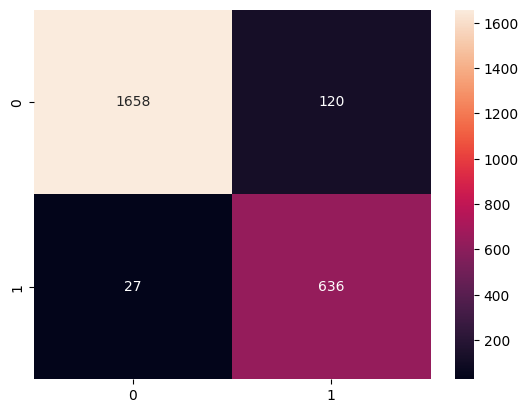

In [19]:
cm = confusion_matrix(dataset_teste.classes, previsoes)
sns.heatmap(cm, annot=True, fmt="d")

In [20]:
classificacao_report = classification_report(dataset_teste.classes, previsoes)
print(classificacao_report)

              precision    recall  f1-score   support

           0       0.98      0.93      0.96      1778
           1       0.84      0.96      0.90       663

    accuracy                           0.94      2441
   macro avg       0.91      0.95      0.93      2441
weighted avg       0.95      0.94      0.94      2441



## Salvando e carregando

In [21]:
model_json = network.to_json()
with open('network.json', 'w') as json_file:
  json_file.write(model_json)

In [22]:
from keras.models import save_model
network_saved = save_model(network, '/content/weights.hdf5')

In [23]:
with open('network.json', 'r') as json_file:
  json_saved_model = json_file.read()
json_saved_model

'{"module": "keras", "class_name": "Sequential", "config": {"name": "sequential", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_shape": [null, 64, 64, 3], "dtype": "float32", "sparse": false, "name": "input_layer"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Conv2D", "config": {"name": "conv2d", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializ

In [24]:
network_loaded = tf.keras.models.model_from_json(json_saved_model)
network_loaded.load_weights('weights.hdf5')
network_loaded.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [25]:
network_loaded.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 577)                 │         665,281 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 577)                 │         333,506 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │           1,156 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,019,335 (3.89 MB)

 Trainable params: 1,019,335 (3.89 MB)

 Non-trainable params: 0 (0.00 B)

## Testando

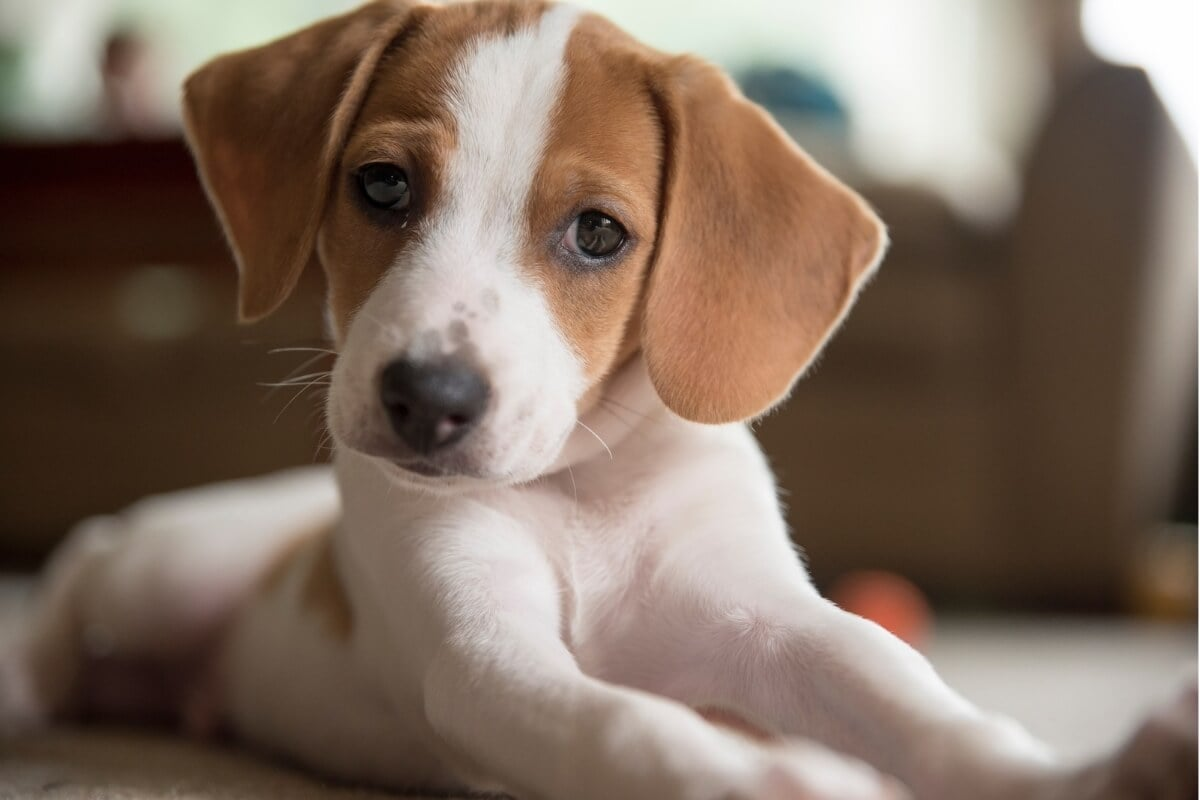

In [86]:
imagem_teste = cv2.imread('/content/7-comportamentos-comuns-do-cachorro-apos-a-adocao (1).jpg')
cv2_imshow(imagem_teste)

In [87]:
imagem_teste.shape

(800, 1200, 3)

In [88]:
image_padronizada = cv2.resize(imagem_teste, (64,64))

array([[[163, 176, 174],
        [178, 191, 189],
        [196, 207, 205],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[156, 169, 167],
        [173, 187, 185],
        [198, 209, 206],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[140, 153, 151],
        [165, 181, 174],
        [199, 210, 207],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[ 60,  69,  82],
        [ 61,  73,  85],
        [ 64,  74,  86],
        ...,
        [ 49,  59,  77],
        [ 35,  47,  65],
        [ 30,  38,  55]],

       [[ 74,  83,  96],
        [ 80,  90, 100],
        [ 68,  77,  90],
        ...,
        [ 34,  44,  62],
        [ 34,  46,  64],
        [ 26,  34,  51]],

       [[ 89,  98, 107],
        [ 91, 101, 111],
        [ 82,  94, 105],
        ...,
        [ 26,  36,  54],
        [ 32,  44,  62],
        [ 22,  30,  47]]], dtype=uint8)
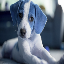

In [89]:
image_padronizada

In [90]:
image_padronizada = image_padronizada/255
image_padronizada

array([[[0.63921569, 0.69019608, 0.68235294],
        [0.69803922, 0.74901961, 0.74117647],
        [0.76862745, 0.81176471, 0.80392157],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       [[0.61176471, 0.6627451 , 0.65490196],
        [0.67843137, 0.73333333, 0.7254902 ],
        [0.77647059, 0.81960784, 0.80784314],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       [[0.54901961, 0.6       , 0.59215686],
        [0.64705882, 0.70980392, 0.68235294],
        [0.78039216, 0.82352941, 0.81176471],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       ...,

       [[0.23529412, 0.27058824, 0.32156863],
        [0.23921569, 0.28627451, 0.33333333],
        [0.25098039, 0

In [91]:
image_padronizada.shape

(64, 64, 3)

In [92]:
image_padronizada = image_padronizada.reshape(-1,64,64,3)
image_padronizada.shape

(1, 64, 64, 3)

In [93]:
previsao = network_loaded.predict(image_padronizada)
previsao

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


array([[0.93242186, 0.06757808]], dtype=float32)

In [94]:
previsoes = np.argmax(previsao, axis=1)
previsoes

array([0])

In [95]:
dataset_teste.class_indices

{'dog': 0, 'lion': 1}

In [96]:
if previsoes == 0:
  print('Dog')
else:
  print('Lion')


Dog
